# EDA of Iris Dataset 
1. Explorative Data Analysis 
2. Possible prediction algo to predict the Species

In [15]:
# Imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
# Loading the data
data = pd.read_csv("Iris.csv")

In [17]:
# Cleaning up the Dataset 
print("Size before cleaning: ", len(data))

# Removing duplicate rows
data = data.drop_duplicates()

# Removing NaN values
data = data.dropna()

# Removing outliers using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]

print("Size after cleaning: ", len(data))

Size before cleaning:  150
Size after cleaning:  149


Species
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64


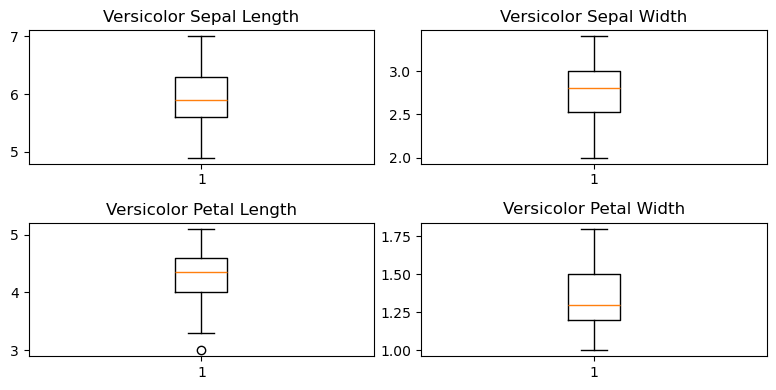

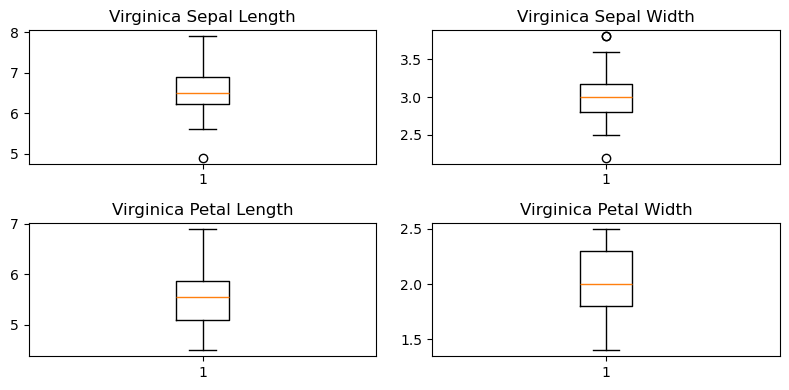

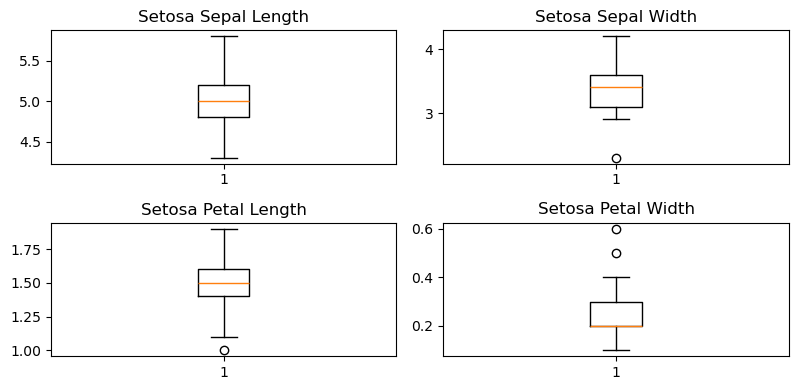

In [18]:
# Getting information about the dataset 
print(data['Species'].value_counts())
versicolor = data[data['Species'] == "Iris-versicolor"]
virginica = data[data['Species'] == "Iris-virginica"]
setosa = data[data['Species'] == "Iris-setosa"]

def make_boxplots(dataset, name):
    # Boxplots for Versicolor Sepal and Petal dimensions
    fig, axs = plt.subplots(2, 2, figsize=(8, 4))

    # Sepal Length
    axs[0, 0].boxplot(dataset['SepalLengthCm'])
    axs[0, 0].set_title(f'{name} Sepal Length')

    # Sepal Width
    axs[0, 1].boxplot(dataset['SepalWidthCm'])
    axs[0, 1].set_title(f'{name} Sepal Width')

    # Petal Length
    axs[1, 0].boxplot(dataset['PetalLengthCm'])
    axs[1, 0].set_title(f'{name} Petal Length')

    # Petal Width
    axs[1, 1].boxplot(dataset['PetalWidthCm'])
    axs[1, 1].set_title(f'{name} Petal Width')

    plt.tight_layout()
    #plt.close(fig)
    plt.savefig(f'Graphics/Boxplots_{name}.png')

make_boxplots(versicolor, "Versicolor")
make_boxplots(virginica, "Virginica")
make_boxplots(setosa, "Setosa")
    

## Information about the Dataset: 
Species<br>
Iris-versicolor - 50 <br>
Iris-virginica - 50 <br>
Iris-setosa - 49 <br>
### Iris - Setosa 
![image.png](Graphics/Boxplots_Setosa.png)
### Iris - Versicolor 
![image.png](Graphics/Boxplots_Versicolor.png)
### Iris - Virginica 
![image.png](Graphics/Boxplots_Virginica.png)


## Small NN for Classification between the sets
This will probalby not yield great results as the dataset is so small

In [19]:
import torch
import torch.nn as nn

class MLP(nn.Module): 
    def __init__(self, dim_in, classes): 
        self.mlp = nn.Sequential(
            nn.Linear(dim_in, 16),
            nn.Linear(16, 32),
            nn.Linear(32, 64),
            nn.Linear(64, classes)
        )
        self.tanh = nn.Tanh()

    def forward(self, x): 
        out = self.mlp(x)
        out = self.tanh(out)
        return out

In [20]:
# Prepare the Data for MLP 
copy_data = data
# One-hot encode the Species column
copy_data['Species'] = copy_data['Species'].astype('category').cat.codes

# Remove the 'Id' column
copy_data = copy_data.drop(columns=['Id'])

# Convert the DataFrame to a numpy array
data_array = copy_data.to_numpy



def train(data, num_epochs, batch_size, ):
    pass